### Dropbox link for beans20190718.nwb: https://www.dropbox.com/s/srra33e0igaj5rm/beans20190718.nwb?dl=0

In [3]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
data_dir = '/stelmo/nwb'
os.environ['NWB_DATAJOINT_BASE_DIR'] = data_dir
os.environ['KACHERY_STORAGE_DIR'] = os.path.join(data_dir, 'kachery-storage')

In [4]:

import datajoint as dj
#dj.config['database.host'] = 'lmf-db.cin.ucsf.edu'
#dj.config['database.user'] = 'loren'
import nwb_datajoint as nd

Connecting loren@lmf-db.cin.ucsf.edu:3306


In [8]:
import warnings
warnings.simplefilter('ignore')

/home/loren/anaconda3/envs/nwb_datajoint/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
nd.insert_sessions(['despereaux20191125.nwb'])


Creating a copy of NWB file despereaux20191125.nwb with link to raw ephys data: despereaux20191125_.nwb
Populate Session...
Institution...
Lab...
LabMember...
Subject...
DataAcquisitionDevice...
CameraDevice...
Inserted ['despereaux sleep camera', 'despereaux run camera']
Probe...
Skipping Apparatus for now...
IntervalList...
Populate ExperimenterList...
Populate ElectrodeGroup...
Populate Electrode...
Populate Raw...
Estimating sampling rate...
Estimated sampling rate: 30000.0
Importing raw data: Estimated sampling rate:	30000.0 Hz
                    Number of valid intervals:	7
Populate SampleCount...
Populate DIOEvants...
Populate SensorData
Populate TaskEpochs
Populate StateScriptFile
Populate VideoFile
RawPosition...
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw 

#### Let's look at the core schema (schema = database table). 
First, Nwbfile:

In [16]:
nd.common.Nwbfile()


nwb_file_name name of the NWB file,nwb_file_abs_path
despereaux20191125_.nwb,=BLOB=
beans20190718_.nwb,=BLOB=
peanut20201117_.nwb,=BLOB=


In [12]:
(nd.common.Nwbfile()).cleanup()

Each NWB file defines a session which also also information about the subject, institution, etc.:

In [ ]:
nd.common.Session()

We can use the datajoint Diagram method to represent the relationship between Nwbfile and Session: 
Session is defined by a Nwbfile

/home/loren/anaconda3/envs/nwb_datajoint/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


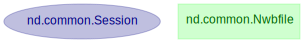

In [9]:
dj.Diagram(nd.common.Nwbfile()) + dj.Diagram(nd.common.Session())

The solid line indicates that the Nwbfile is the primary key for Session, so each Session has exactly one Nwbfile associated with it.

The session also contains references to other schema, including Subject(), Institution, etc. 

In [ ]:
dj.Diagram(nd.common.Nwbfile()) + dj.Diagram(nd.common.Session()) + dj.Diagram(nd.common.Subject()) + dj.Diagram(nd.common.Institution()) + dj.Diagram(nd.common.Lab())

In [19]:
nd.common.Session()

nwb_file_name name of the NWB file,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description
beans20190718_.nwb,Beans,"University of California, San Francisco",Loren Frank,beans_01,Reinforcement leaarning,2019-07-18 15:29:47,1970-01-01 00:00:00,Reinforcement learning
despereaux20191125_.nwb,Despereaux,"University of California, San Francisco",Loren Frank,4,Sungod,2019-11-25 10:17:29,1970-01-01 00:00:00,Sungod control
peanut20201117_.nwb,peanut,"University of California, San Francisco",Loren Frank,peanut_20201117,spatial alternation memory task,2020-11-17 08:50:38,1970-01-01 00:00:00,spatial alternation memory task


In [36]:
a = (nd.common.Raw() & {'nwb_file_name': 'peanut20201117_.nwb'}).fetch_nwb()


In [33]:
a[0]['raw'].timestamps

<HDF5 dataset "timestamps": shape (36478349,), type "<f8">

In [ ]:
dj.Diagram(nd.common.Subject()) + dj.Diagram(nd.common.Session())+dj.Diagram(nd.common.Nwbfile())+dj.Diagram(nd.common.Raw())

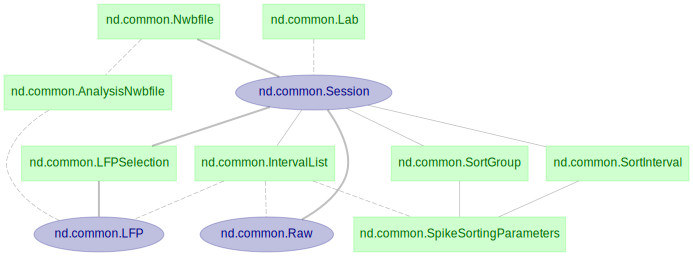

In [17]:
dj.Diagram(nd.common.Session())+dj.Diagram(nd.common.Nwbfile())+dj.Diagram(nd.common.Raw())+dj.Diagram(nd.common.LFP())+dj.Diagram(nd.common.SpikeSortingParameters())+dj.Diagram(nd.common.Lab)

In [ ]:
a = (nd.common.IntervalList() & {'interval_list_name' : 'raw data valid times'}).fetch1('valid_times')
print(a)


In [ ]:
nd.common.VideoFile()

In [ ]:
data = (nd.common.Raw() & {'nwb_file_name' : 'beans20190718.nwb'}).fetch_nwb()

In [29]:
nd.common.Lab.list_tables()

AttributeError: type object 'Lab' has no attribute 'list_tables'

In [ ]:
nd.common.SpikeSorting().drop()

In [ ]:
nd.common.Session().delete()
nd.common.Nwbfile().drop()

In [ ]:
nd.common.Nwbfile().delete()

In [ ]:
(nd.common.Raw() & {'nwb_file_name' : 'beans20190718.nwb'}).fetch1('interval_list_name')

In [ ]:
nd.common.SpikeSorting().drop()

In [ ]:
s1 = (nd.common.IntervalList() & {'interval_list_name': '01_s1'}).fetch1()
s2 = (nd.common.IntervalList() & {'interval_list_name': '03_s2'}).fetch1()
r1 = (nd.common.IntervalList() & {'interval_list_name': '02_r1'}).fetch1()

r2 = (nd.common.IntervalList() & {'interval_list_name': '04_r2'}).fetch1()

In [35]:
nd.common.IntervalList()
#s1 = (nd.common.IntervalList() & {'interval_list_name' : '01_s1'}).fetch1('valid_times')

nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,valid_times numpy array with start and end times for each interval
beans20190718_.nwb,01_s1,=BLOB=
beans20190718_.nwb,02_r1,=BLOB=
beans20190718_.nwb,03_s2,=BLOB=
beans20190718_.nwb,04_r2,=BLOB=
beans20190718_.nwb,pos 0 valid times,=BLOB=
beans20190718_.nwb,pos 1 valid times,=BLOB=
beans20190718_.nwb,pos 2 valid times,=BLOB=
beans20190718_.nwb,pos 3 valid times,=BLOB=
beans20190718_.nwb,raw data valid times,=BLOB=
despereaux20191125_.nwb,01_s1,=BLOB=


In [ ]:
s1

In [ ]:
t[0][1] = t[0][0] + 100

In [ ]:
t = s1.copy()

In [ ]:
nd.common.IntervalList.insert1({'nwb_file_name' : 'beans20190718.nwb', 'interval_list_name' : 'test', 'valid_times' : t})

In [ ]:
nd.common.IntervalList()

In [ ]:
a = (nd.common.IntervalList() & {'interval_list_name' : '01_s1'}).fetch1()

In [ ]:
a

In [ ]:
b = a.copy()

In [ ]:
b['interval_list_name'] = 'test'

In [ ]:
(nd.common.IntervalList & {'interval_list_name' : 'test'}).delete()